## Predicting cell identity with CellTypist

## import packages

In [1]:
import scanpy as sc
import scipy as io
import pandas as pd

In [2]:
import celltypist
from celltypist import models

In [3]:
import matplotlib.pyplot as plt

In [4]:
sc.set_figure_params(dpi=100)

## import data

In [5]:
adata = sc.read('/scratch/manuel.tardaguila/2026_Ditadi_test/processing_outputs/merged_unprocessed_db_filt_clustered_QCed_reclustered_rna_corrected_unormalized.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 9457 × 36387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5'

In [7]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5
cell_barcode,,,,,,,,,,,,,,,,
MCO_01381_3GEX_AAACCAAAGCTAGGCT-1,MCO_01381_3GEX,1049.0,568,1904.0,1119,0.476644,singlet,0.024691,0.039554,0.000000,Diff_Ditadi_wt,18509.0,4887,11,10,10
MCO_01381_3GEX_AAACCAAAGGCTATAT-1,MCO_01381_3GEX,44869.0,7042,45083.0,7052,4.655776,singlet,0.131803,0.174109,0.090767,Diff_Ditadi_wt,21600.0,5447,1,2,2


In [8]:
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw',
       'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class',
       'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score',
       'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2',
       'seurat_clusters', 'SCT_snn_res.0.5'],
      dtype='object')

# import model Alsinet

In [9]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_Alsinet.pkl')

In [10]:
new_model

CellTypist model with 18 cell types and 4199 features
    date: 2025-01-22 16:40:15.475078
    cell types: AdvancedMesoderm, EarlyFibroblasts, ..., iPSCs
    features: SAMD11, NOC2L, ..., MT-CYB

### apply the model to the object

In [11]:
adata.X.min()

0.0

In [12]:
adata.X.max()

6061.0

In [13]:
adata.raw = adata

In [14]:
adata.raw.X.min()

0.0

In [15]:
adata.raw.X.max()

6061.0

In [16]:
adata.X.expm1().sum(axis = 1)

matrix([[4.46906220e+005],
        [6.05121105e+232],
        [9.70499818e+204],
        ...,
        [            inf],
        [            inf],
        [8.84672135e+049]])

## Renormalize to log1p

In [17]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4) 

In [18]:
sc.pp.log1p(adata)

In [19]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [20]:
#celltypist.annotate??

In [21]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 9457 cells and 36387 genes
🔗 Matching reference genes in the model
🧬 4134 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [22]:
adata = predictions.to_adata()

In [23]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,
MCO_01381_3GEX_AAACCAAAGCTAGGCT-1,MCO_01381_3GEX,1049.0,568,1904.0,1119,0.476644,singlet,0.024691,0.039554,0.000000,Diff_Ditadi_wt,18509.0,4887,11,10,10,1049.0,PrimitiveStreak,0.950941
MCO_01381_3GEX_AAACCAAAGGCTATAT-1,MCO_01381_3GEX,44869.0,7042,45083.0,7052,4.655776,singlet,0.131803,0.174109,0.090767,Diff_Ditadi_wt,21600.0,5447,1,2,2,44869.0,NeutrophilMyeloidProgenitor,0.999860


### visualize celltypist predictions

In [24]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
MastCells                      3180
NeutrophilMyeloidProgenitor    2681
Monocytes                      1947
Megakaryocytes                  829
Mono-DCprec                     318
PrimitiveStreak                 249
EarlyFibroblasts                 93
Macrophages                      87
ErythrocyteLineage               24
MyeloidProgenitors               22
HemogenicEndothelium             13
Fibroblasts                       9
AdvancedMesoderm                  2
EmergentMesoderm                  2
MesoEcto                          1
Name: count, dtype: int64

In [25]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
MastCells                       True
NeutrophilMyeloidProgenitor     True
Monocytes                       True
Megakaryocytes                  True
Mono-DCprec                     True
PrimitiveStreak                 True
EarlyFibroblasts                True
Macrophages                     True
ErythrocyteLineage             False
MyeloidProgenitors             False
HemogenicEndothelium           False
Fibroblasts                    False
AdvancedMesoderm               False
EmergentMesoderm               False
MesoEcto                       False
Name: count, dtype: bool

In [26]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
MastCells                       True
NeutrophilMyeloidProgenitor     True
Monocytes                       True
Megakaryocytes                  True
Mono-DCprec                     True
PrimitiveStreak                 True
EarlyFibroblasts               False
Macrophages                    False
ErythrocyteLineage             False
MyeloidProgenitors             False
HemogenicEndothelium           False
Fibroblasts                    False
AdvancedMesoderm               False
EmergentMesoderm               False
MesoEcto                       False
Name: count, dtype: bool

In [27]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 9384 × 36387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5', 'n_counts', 'predicted_labels', 'conf_score'
    uns: 'log1p'

In [28]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

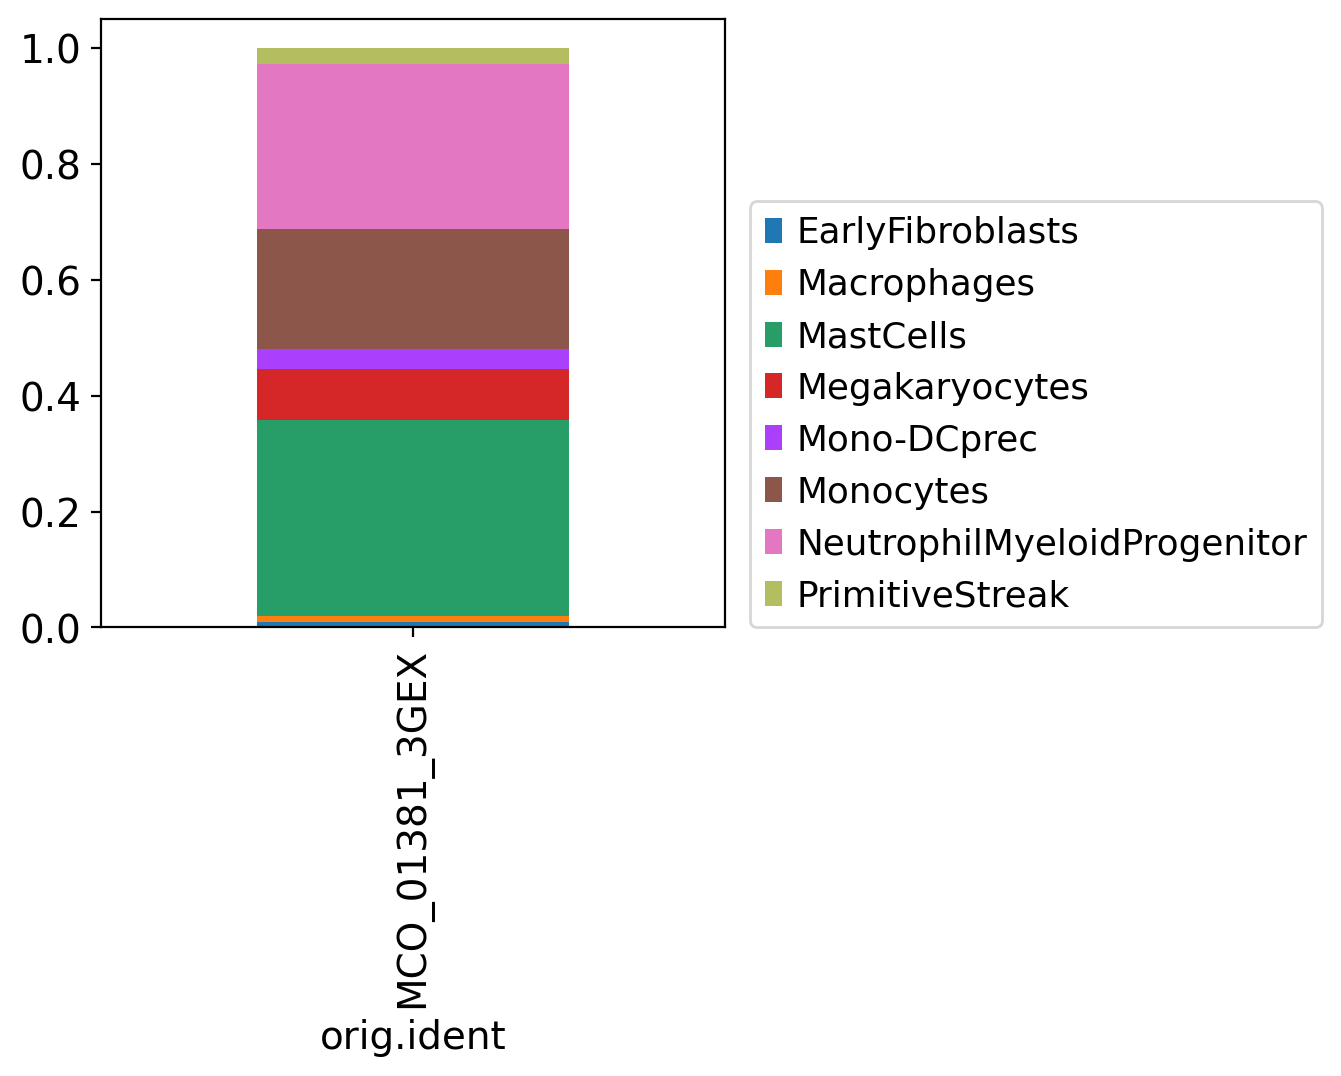

In [29]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [30]:
#for n in list(subset.obs['Genotype'].unique()):

#        wt = subset[subset.obs['Genotype'] == n]
#        wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
#        plt.legend(loc=(1.04, 0))

In [31]:
#for n in list(subset.obs['Genotype'].unique()):'

#        wt = subset[subset.obs['Genotype'] == n]
 #       wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6), title=n)
  #      plt.legend(loc=(1.04, 0))

In [32]:
#wt = subset[subset.obs['Genotype'] == 'G/G']

In [33]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [34]:
#wt.obs.groupby('time_diffgroup_geno')['predicted_labels'].value_counts(normalize=False).unstack().plot.bar(stacked=True, grid=False, figsize=(20,6))
#plt.legend(loc=(1.04, 0))

In [35]:
import os
from matplotlib import pyplot as plt


In [37]:
from pathlib import Path

path = Path("/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/graphs/")

# Create the directory (parents=True is the -p flag)
path.mkdir(parents=True, exist_ok=True)

# Change directory
os.chdir(path)

### checking confidence score

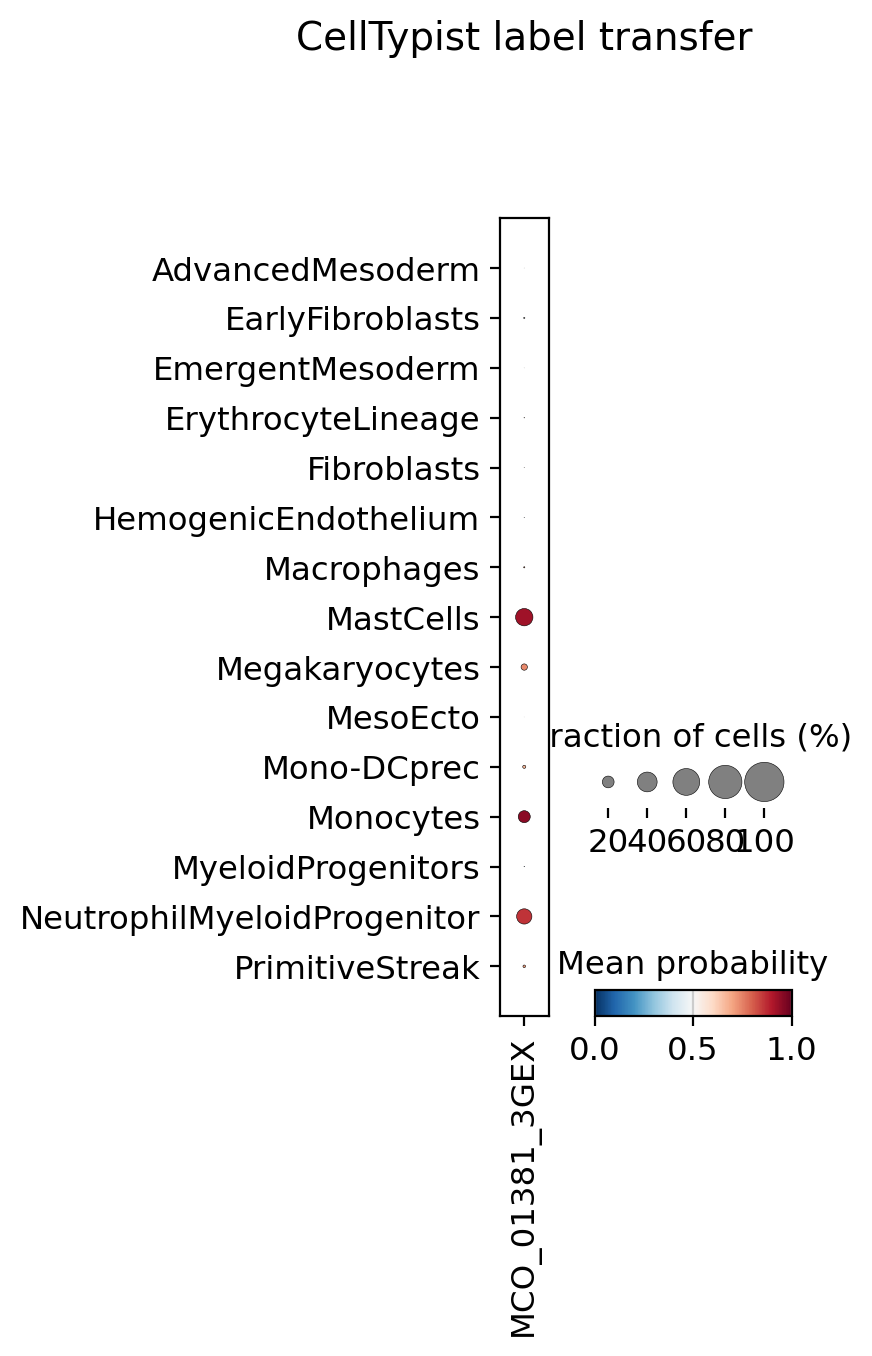

In [38]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_Alsinet.pdf')

### save results

In [39]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist//Alsinet_celltypist_prediction.csv')

# import model f_BMA

In [40]:
new_model = models.Model.load('/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/model_from_BMA.pkl')

In [41]:
new_model

CellTypist model with 64 cell types and 6071 features
    date: 2024-04-09 21:20:12.035942
    cell types: CD14 monocyte, CD4 T cell, ..., tip EC
    features: SAMD11, HES4, ..., RGR

In [42]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [43]:
#celltypist.annotate??

In [44]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 9457 cells and 36387 genes
🔗 Matching reference genes in the model
🧬 5667 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [45]:
adata = predictions.to_adata()

In [46]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,
MCO_01381_3GEX_AAACCAAAGCTAGGCT-1,MCO_01381_3GEX,1049.0,568,1904.0,1119,0.476644,singlet,0.024691,0.039554,0.000000,Diff_Ditadi_wt,18509.0,4887,11,10,10,1049.0,late erythroid,0.416271
MCO_01381_3GEX_AAACCAAAGGCTATAT-1,MCO_01381_3GEX,44869.0,7042,45083.0,7052,4.655776,singlet,0.131803,0.174109,0.090767,Diff_Ditadi_wt,21600.0,5447,1,2,2,44869.0,GMP,0.290572


### visualize celltypist predictions

In [47]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
GMP                        1485
promyelocyte                867
CD14 monocyte               800
mast cell                   788
neutrophil                  668
DC3                         632
basophil                    612
MEP                         548
late erythroid              420
promonocyte                 287
osteoclast                  287
pre pro B progenitor        284
MK                          261
early MK                    228
MOP                         218
eosinophil                  176
pre B progenitor            170
eo/baso/mast precursor      162
DC2                         137
early erythroid              96
myelocyte                    81
ELP                          55
monocytoid macrophage        47
stromal macrophage           34
DC precursor                 28
CMP                          15
pro B progenitor             14
naive B cell                 12
HSC/MPP                      12
CD56 bright NK                7
osteochondral precursor

In [48]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
GMP                         True
promyelocyte                True
CD14 monocyte               True
mast cell                   True
neutrophil                  True
DC3                         True
basophil                    True
MEP                         True
late erythroid              True
promonocyte                 True
osteoclast                  True
pre pro B progenitor        True
MK                          True
early MK                    True
MOP                         True
eosinophil                  True
pre B progenitor            True
eo/baso/mast precursor      True
DC2                         True
early erythroid             True
myelocyte                   True
ELP                         True
monocytoid macrophage      False
stromal macrophage         False
DC precursor               False
CMP                        False
pro B progenitor           False
naive B cell               False
HSC/MPP                    False
CD56 bright NK            

In [49]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
GMP                         True
promyelocyte                True
CD14 monocyte               True
mast cell                   True
neutrophil                  True
DC3                         True
basophil                    True
MEP                         True
late erythroid              True
promonocyte                 True
osteoclast                  True
pre pro B progenitor        True
MK                          True
early MK                    True
MOP                         True
eosinophil                  True
pre B progenitor            True
eo/baso/mast precursor      True
DC2                         True
early erythroid            False
myelocyte                  False
ELP                        False
monocytoid macrophage      False
stromal macrophage         False
DC precursor               False
CMP                        False
pro B progenitor           False
naive B cell               False
HSC/MPP                    False
CD56 bright NK            

In [50]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 9262 × 36387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5', 'n_counts', 'predicted_labels', 'conf_score'
    uns: 'log1p'

In [51]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

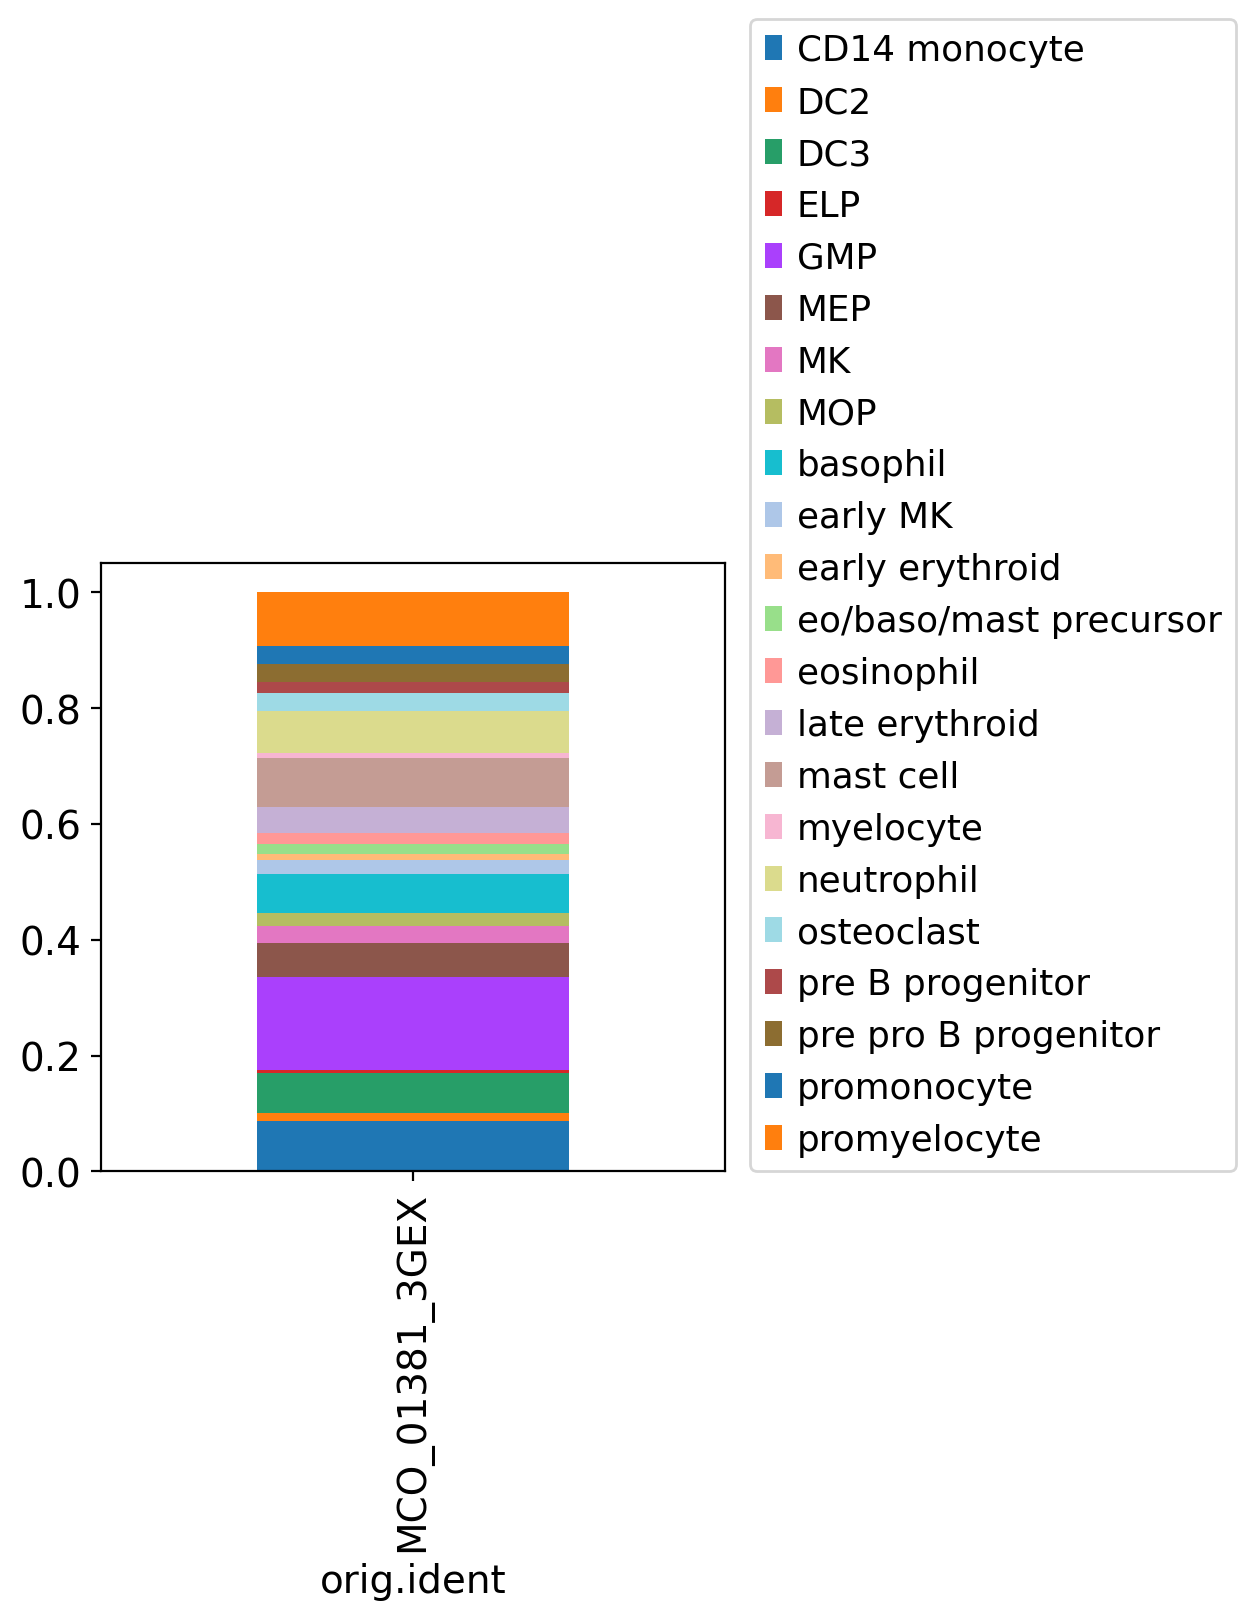

In [52]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [53]:
os.chdir("/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/graphs/")

### checking confidence score

In [54]:
#celltypist.dotplot??

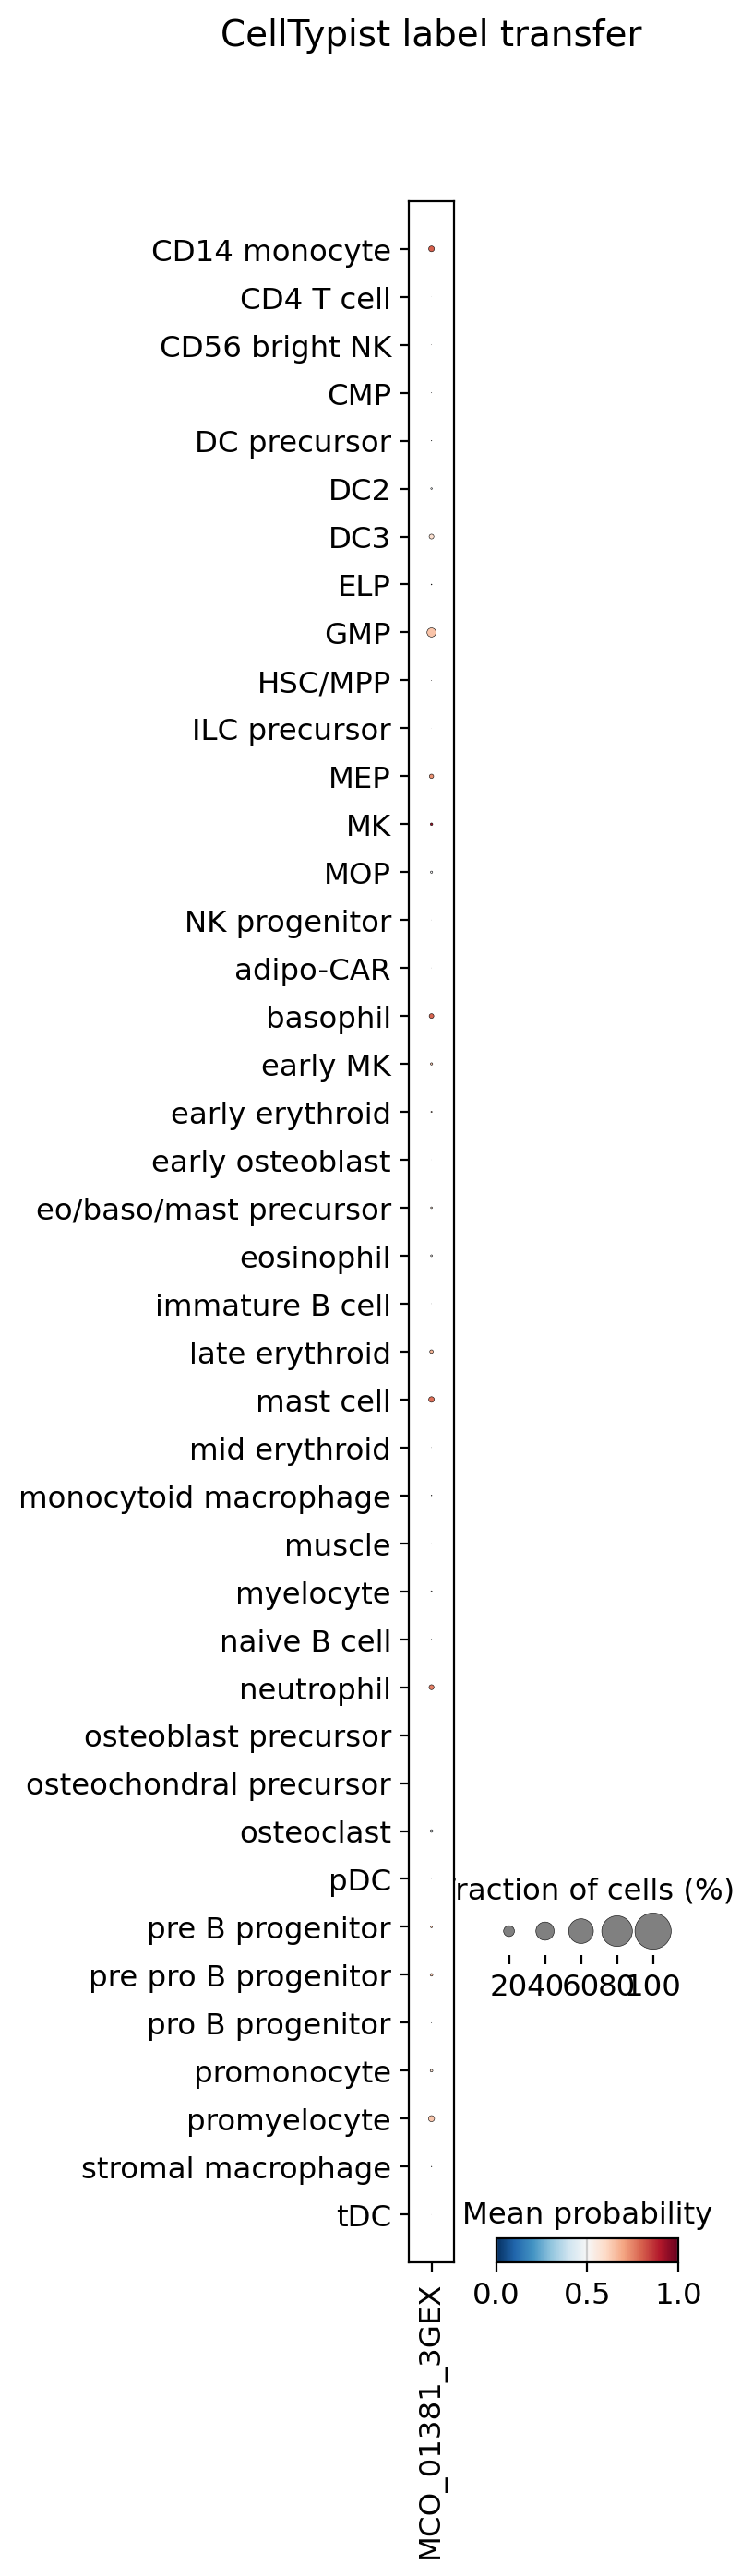

In [55]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save='Dotplot_FBMA.pdf')

### save results

In [56]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/FBMA_celltypist_prediction.csv')

# import model Immune_All_Low

In [57]:
new_model = models.Model.load("/group/soranzo/manuel.tardaguila/2025_hESC_MK_multiome/Dependencies/Immune_All_Low.pkl")

In [58]:
new_model

CellTypist model with 98 cell types and 6639 features
    date: 2022-07-16 00:20:42.927778
    details: immune sub-populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: Age-associated B cells, Alveolar macrophages, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [59]:
adata.X.expm1().sum(axis = 1)

matrix([[10000.],
        [10000.],
        [10000.],
        ...,
        [10000.],
        [10000.],
        [10000.]])

In [60]:
#celltypist.annotate??

In [61]:
predictions = celltypist.annotate(adata, model = new_model)

🔬 Input data has 9457 cells and 36387 genes
🔗 Matching reference genes in the model
🧬 6134 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


In [62]:
adata = predictions.to_adata()

In [63]:
adata.obs.head(2)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_RNA_raw,nFeature_RNA_raw,percent.mt,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,Diff,nCount_SCT,nFeature_SCT,SCT_snn_res.2,seurat_clusters,SCT_snn_res.0.5,n_counts,predicted_labels,conf_score
cell_barcode,,,,,,,,,,,,,,,,,,,
MCO_01381_3GEX_AAACCAAAGCTAGGCT-1,MCO_01381_3GEX,1049.0,568,1904.0,1119,0.476644,singlet,0.024691,0.039554,0.000000,Diff_Ditadi_wt,18509.0,4887,11,10,10,1049.0,Double-positive thymocytes,0.245291
MCO_01381_3GEX_AAACCAAAGGCTATAT-1,MCO_01381_3GEX,44869.0,7042,45083.0,7052,4.655776,singlet,0.131803,0.174109,0.090767,Diff_Ditadi_wt,21600.0,5447,1,2,2,44869.0,Neutrophil-myeloid progenitor,0.999648


### visualize celltypist predictions

In [64]:
adata.obs['predicted_labels'].value_counts()

predicted_labels
Mast cells                       3095
Neutrophil-myeloid progenitor    1990
Classical monocytes              1656
Plasmablasts                      484
CD16- NK cells                    351
                                 ... 
Tem/Trm cytotoxic T cells           1
Follicular B cells                  1
Type 17 helper T cells              1
Cycling monocytes                   1
pDC                                 1
Name: count, Length: 63, dtype: int64

In [65]:
## remove labels under 50 cells
adata.obs['predicted_labels'].value_counts() > 50

predicted_labels
Mast cells                        True
Neutrophil-myeloid progenitor     True
Classical monocytes               True
Plasmablasts                      True
CD16- NK cells                    True
                                 ...  
Tem/Trm cytotoxic T cells        False
Follicular B cells               False
Type 17 helper T cells           False
Cycling monocytes                False
pDC                              False
Name: count, Length: 63, dtype: bool

In [66]:
## remove labels under 100 cells
adata.obs['predicted_labels'].value_counts() > 100

predicted_labels
Mast cells                        True
Neutrophil-myeloid progenitor     True
Classical monocytes               True
Plasmablasts                      True
CD16- NK cells                    True
                                 ...  
Tem/Trm cytotoxic T cells        False
Follicular B cells               False
Type 17 helper T cells           False
Cycling monocytes                False
pDC                              False
Name: count, Length: 63, dtype: bool

In [67]:
counts = adata.obs['predicted_labels'].value_counts() 
valids = counts[counts>50].index

adata[adata.obs['predicted_labels'].isin(valids)]

View of AnnData object with n_obs × n_vars = 9001 × 36387
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'percent.mt', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'Diff', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.2', 'seurat_clusters', 'SCT_snn_res.0.5', 'n_counts', 'predicted_labels', 'conf_score'
    uns: 'log1p'

In [68]:
subset = adata[adata.obs['predicted_labels'].isin(valids)]

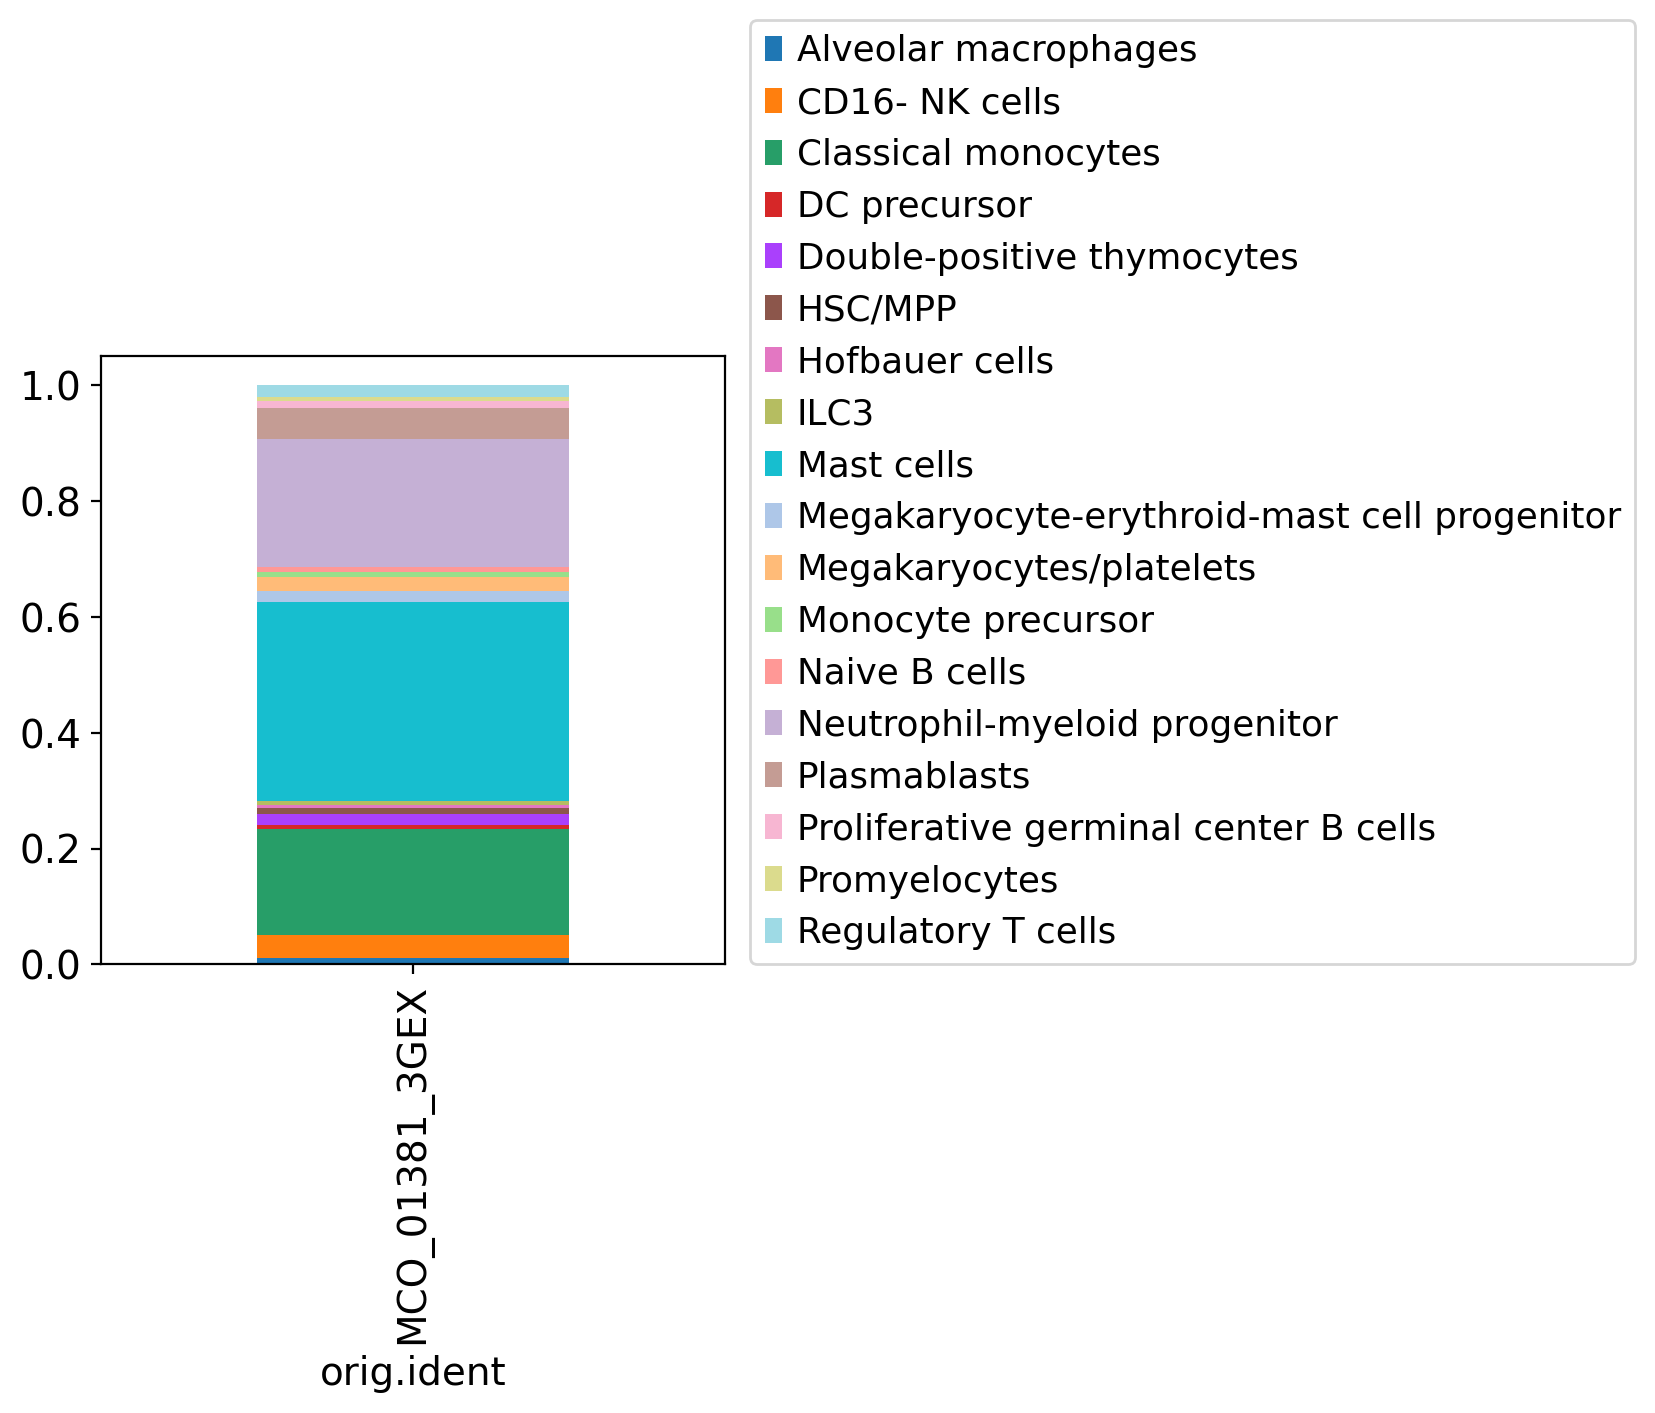

In [69]:
subset.obs.groupby('orig.ident')['predicted_labels'].value_counts(normalize=True).unstack().plot.bar(stacked=True, grid=False)
plt.legend(loc=(1.04, 0))

In [70]:
os.chdir("/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/graphs/")

### checking confidence score

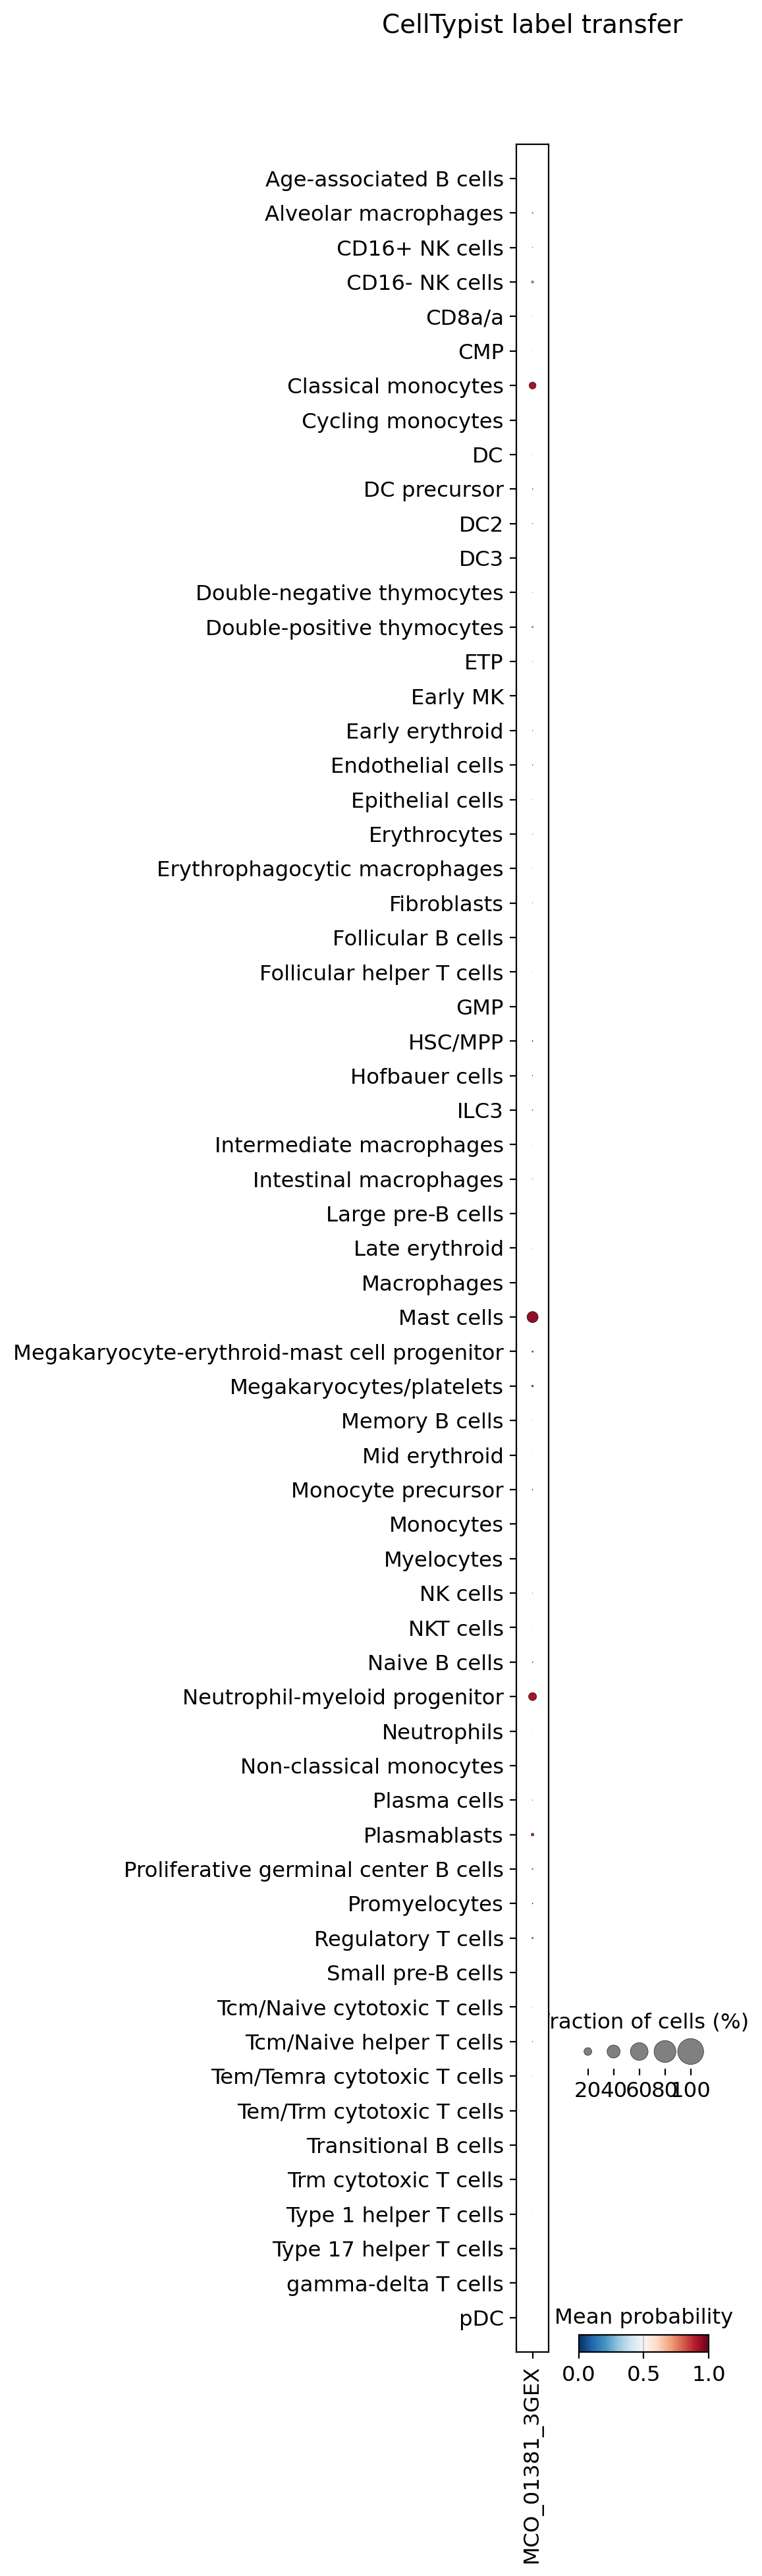

In [71]:
celltypist.dotplot(predictions, use_as_reference = 'orig.ident', use_as_prediction = 'predicted_labels', save="Immune_ALL_low.pdf")

### save results

In [72]:
adata.obs.to_csv('/group/soranzo/manuel.tardaguila/2026_Ditadi_test/CellTypist/Immune_ALL_low_celltypist_prediction.csv')